# Project 2: Exploratory Data Analysis and Unsupervised Learning

In [28]:
# Ignoring warning
import warnings
warnings.simplefilter('ignore')
# Importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Fixing random state for reproducibility
np.random.seed(160010010)

## Preparing iris data

In [29]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data['target'] = pd.Series(iris.target)
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']
target_classes = ['setosa','versicolor','virginica']
print("The number of observations are :", iris_data.shape[0])
print("Name of columns are :", iris_data.columns.values)
print("Here are some rows from our final dataframe:")
print(iris_data.head())

The number of observations are : 150
Name of columns are : ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']
Here are some rows from our final dataframe:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


## Question 1

### 1.1 Perform a visual exploration of the Iris dataset using scatterplots

Text(0,0.5,'sepal width (cm)')

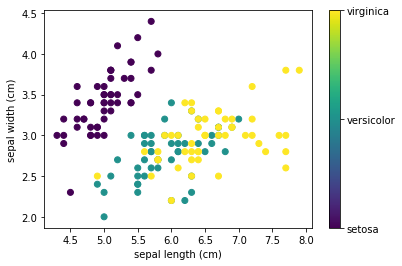

In [30]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i , *args: target_classes[i])
plt.scatter(x=iris_data.sepal_length,y=iris_data.sepal_width,c=iris_data.species)
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0,0.5,'petal width (cm)')

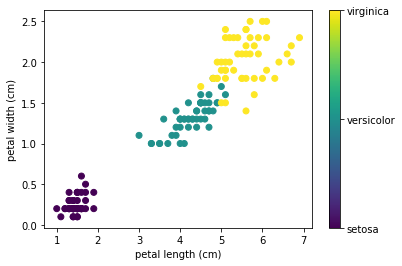

In [31]:
plt.scatter(x=iris_data.petal_length,y=iris_data.petal_width,c=iris_data.species)
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

### 1.2 Use pairplot() for the whole dataset to look at all of our features simultaneously

In [32]:
# Giving each species name in our dataframe
iris_data_with_labels = iris_data.copy(deep=True)
iris_data_with_labels.species = pd.Series([target_classes[x] for x in iris_data.species])
print("New dataframe :")
print(iris_data_with_labels.head())

New dataframe :
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


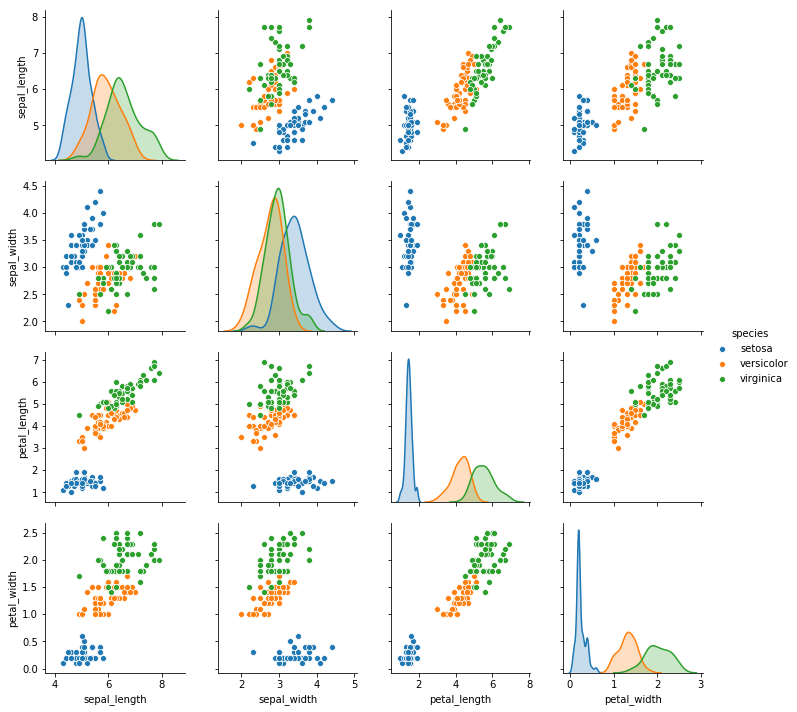

In [33]:
sns.pairplot(iris_data_with_labels, hue="species")  # making matrix plot between each variables and coloring points based on its
# category

### Correlation matrix

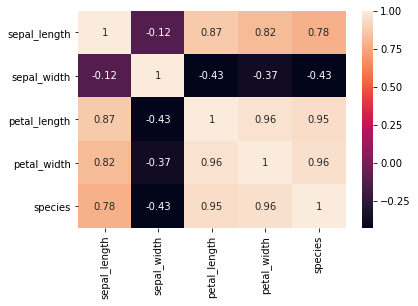

In [34]:
corr = iris_data.corr()
sns.heatmap(corr,annot=True)

### 1.3 Explain what insights you can get from the plots
We can observe from our pairplot that if we petal length and petal width of setosa is very different from that of other two species. Petal length and petal width are also very correlated. In the scatter plot of petal length with petal width, we can see that setosa is seperated from other two species and there is a indistinguishable boundary between versicolor and virginica. So if our goal has been to seperate setosa from the two other species, then petal length and petal width will be considered the ideal features.

Sepal length and sepal width of all three species are not very seperate. By observing the pairplot, we can see that in almost all scatter plots, setosa is seperate from the other two species. In some scatter plots, versicolor and virginica and seperated by indisguishable boundary and in other plots, they are intermingled.

### 1.4 What conclusions could be drawn regarding the correlations among the numerical features in our dataset.
We can observe from our correlation matrix that, there is a high correlation between "sepal length and petal length", "sepal length and petal width", and "petal length and petal width". So we can say that sepal lenth, petal length, and petal width are highly correlated among themselves but they are not correlated significantly with the sepal width.

## Question 2

### 2.1 Visualize the features of Iris images using histograms ,boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04a2686c50>,
      dtype=object)

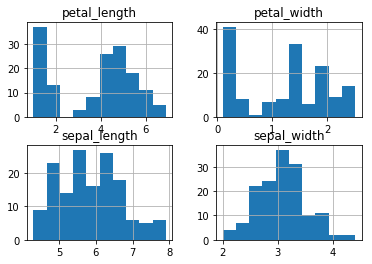

In [35]:
# Creating histogram
iris_data_with_labels.hist(bins=10)

### Creating boxplots

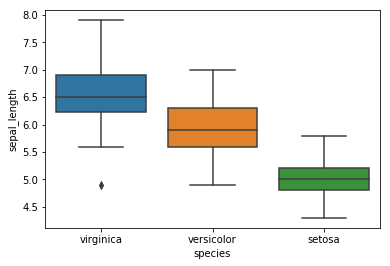

In [36]:
sns.boxplot(x='species', y='sepal_length', data=iris_data_with_labels, order=["virginica", "versicolor", "setosa"])

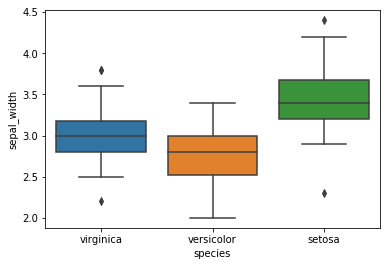

In [37]:
sns.boxplot(x='species', y='sepal_width', data=iris_data_with_labels, order=["virginica", "versicolor", "setosa"])

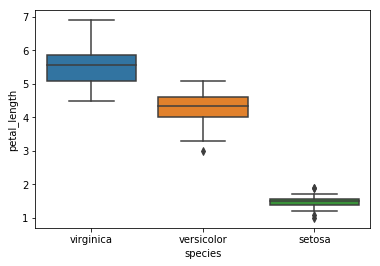

In [38]:
sns.boxplot(x='species', y='petal_length', data=iris_data_with_labels, order=["virginica", "versicolor", "setosa"])

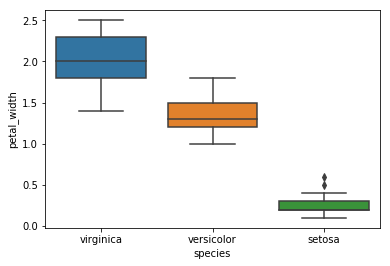

In [39]:
sns.boxplot(x='species', y='petal_width', data=iris_data_with_labels, order=["virginica", "versicolor", "setosa"])

### 2.2 State your inferences about the iris dataset
From histograms and boxplots, we can see that petal width and petal length of different species are quite separate. sepal length is also little seperate. But sepal width is not separate for different species. And we can see a trend in petal width, petal length and sepal length of flowers of different species, as we are moving from viginica to setosa, these lengths are decreasing.

## Question 3: Visualizing the dataset using 3D-plots

### 3.1 Analyse the Iris dataset by plotting a 3D view using any three features

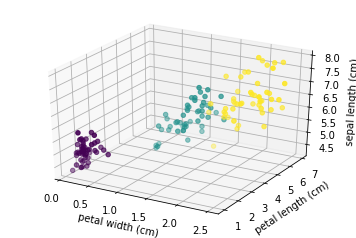

In [40]:
# Since petal width, petal length and sepal length are correlated with the species of flower, we are going
# to plot these variables on the 3 axes
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data.petal_width, iris_data.petal_length, iris_data.sepal_length, c=iris_data.species)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
plt.show()

### 3.2 Explain your observations
We can see that all the three species are clustered. The cluster of setosa is separate from the other two species. And there is an indistinguishable separation between versicolor and virginica. 

I have chosen sepal length, petal width and petal length as our three axes because the clusters formed by taking these three features are more saperate than taking any other set of three features.

## Question 4: Implement k-means clustering algorithm and test using the Iris dataset

In [41]:
import random
import numpy as np

def EuclidianDistance(x,y):
    # This function will return Euclidian distance between x and y,
    # where x and y are n-dimensional vector
    xi = np.array(list(x))
    yi = np.array(list(y))
    return np.sqrt(np.sum(np.square(xi - yi)))

def Calculate_Mean_Square_Error(assignment_of_nodes,current_centers,dataframe):
    # This funciton will calculate the mean square error or J 
    # When provided with centers, assignment of nodes and dataframe
    result = 0
    length_of_dataframe = dataframe.shape[0]
    for x in range(length_of_dataframe):
        result += EuclidianDistance(dataframe.loc[dataframe.index[x], :],
                current_centers.loc[current_centers.index[int(assignment_of_nodes[x])], :]) ** 2
    result = result / length_of_dataframe
    return result

def KmeansCluster(dataframe, number_of_clusters, maximum_number_of_iteration = 100000):
    # This function will assign a group to every data point, and then it will return
    # the assignment, all the assignments that was calculated in each iteration, and 
    # a list of value of J in each iteration.
    length_of_dataframe = dataframe.shape[0]
    width_of_dataframe = dataframe.shape[1]
    # choose k random points and make them centers
    random_indices = random.sample(list(range(length_of_dataframe)), number_of_clusters)
    current_centers = dataframe.loc[random_indices, :]
    # assign label to each of the observation points
    all_assignments = []
    mean_square_list = []
    assignment_of_nodes = np.zeros(length_of_dataframe)
    previous_assignment_of_nodes = np.copy(assignment_of_nodes)
    # iterate till maximum number of times or when the assignment of nodes is not changing
    for ix in range(maximum_number_of_iteration):
        # assign group to every data point 
        for i in range(length_of_dataframe):
            current_assignment = 0
            for j in range(number_of_clusters):
                current_distance = EuclidianDistance(dataframe.loc[dataframe.index[i], :],
                        current_centers.loc[current_centers.index[current_assignment], :])
                new_distance = EuclidianDistance(dataframe.loc[dataframe.index[i], :],
                         current_centers.loc[current_centers.index[j], :])
                if new_distance < current_distance:
                    current_assignment = j
            assignment_of_nodes[i] = current_assignment
        this_assignment = list(assignment_of_nodes)
        this_assignment = [int(x) for x in this_assignment]
        all_assignments.append(this_assignment)
        mean_square_list.append(Calculate_Mean_Square_Error(assignment_of_nodes,
                                                            current_centers,dataframe))
        if np.sum(previous_assignment_of_nodes == assignment_of_nodes) == dataframe.shape[0]:
            break
        previous_assignment_of_nodes = np.copy(assignment_of_nodes)
        # calculating the center again
        for i in range(number_of_clusters):
            current_centers.loc[current_centers.index[i]] = dataframe.loc[assignment_of_nodes == i, :].mean(0)
    # post-processing results
    assignment_of_nodes = list(assignment_of_nodes)
    assignment_of_nodes = [int(x) for x in assignment_of_nodes]
    return (assignment_of_nodes, all_assignments, mean_square_list)

In [42]:
clusters, all_assignment, mean_square_list = KmeansCluster(iris_data[list(iris_data.columns[:-1])],3)

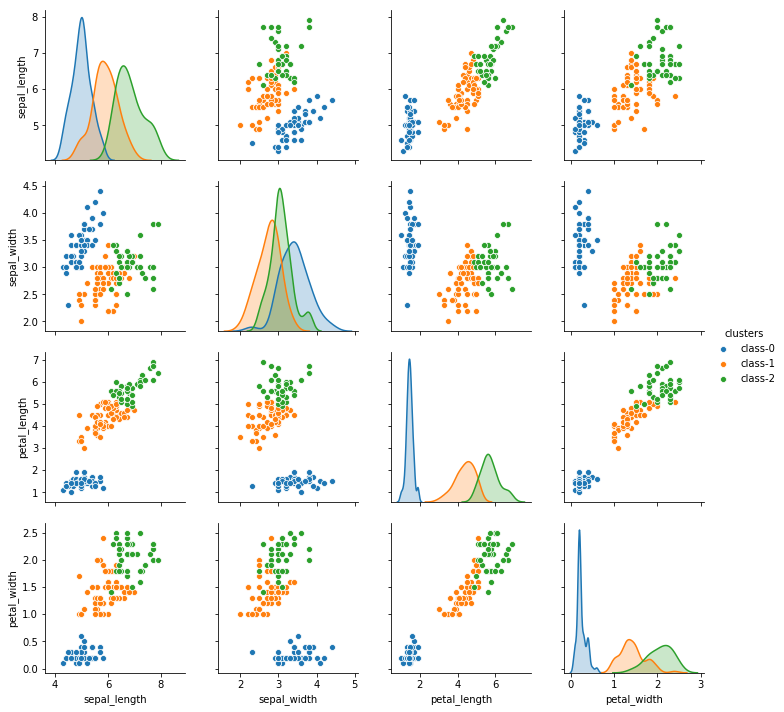

In [43]:
# Ploting final cluster assignment
newframe = iris_data[list(iris_data.columns[:-1])]
label_classes = ['class-0','class-1','class-2']
newframe["clusters"] = pd.Series([label_classes[i] for i in clusters])
sns.pairplot(newframe, hue='clusters')

### 4.1 Perform change of color code for clusters at each iterations

<IPython.core.display.Javascript object>


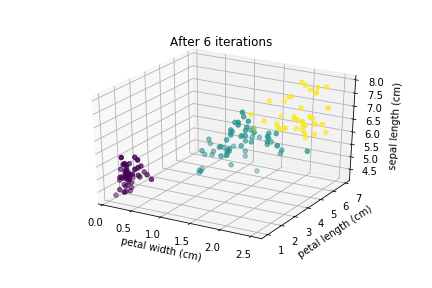

Text(0.5,0.92,'Final Assignment')

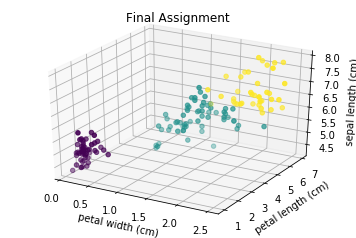

In [44]:
%matplotlib notebook
import time

#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
ax = fig.gca(projection='3d')
number_of_iteration_completed = 0
for current_cluster in all_assignment:
    ax.clear() # - Clear
    current_frame = iris_data[list(iris_data.columns[:-1])]
    current_frame["clusters"] = pd.Series(current_cluster)
    ax.scatter(current_frame.petal_width, current_frame.petal_length, 
               current_frame.sepal_length, c=current_frame.clusters)
    ax.set_xlabel('petal width (cm)')
    ax.set_ylabel('petal length (cm)')
    ax.set_zlabel('sepal length (cm)')
    number_of_iteration_completed += 1
    title = "After " + str(number_of_iteration_completed) + " iterations"
    ax.set_title(title)
    fig.canvas.draw()
    time.sleep(2)
# Plotting final assignment
final_frame = iris_data[list(iris_data.columns[:-1])]
final_frame["clusters"] = pd.Series(clusters)
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(final_frame.petal_width, final_frame.petal_length, final_frame.sepal_length, c=final_frame.clusters)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title('Final Assignment')

### 4.2 Compute the sum of squared error (i.e. function J from class notes) for each iteration

In [45]:
number_of_iterations = len(mean_square_list)
for i in range(number_of_iterations):
    print("Value of J after " + str(i+1) + " iterations is " + str(mean_square_list[i]))

Value of J after 1 iterations is 3.548666666666665
Value of J after 2 iterations is 1.0410287604427417
Value of J after 3 iterations is 0.5693608531991621
Value of J after 4 iterations is 0.5296883897024599
Value of J after 5 iterations is 0.5260670449097136
Value of J after 6 iterations is 0.5256762761743067


### 4.3 Visualize the sum of squared error and check for convergence of the k-means algorithm using line plot (error vs. iteration: iteration numbers on x- axis and error values on y-axis)

Text(0.5,1,'How value of J is changing with the number of iterations.')

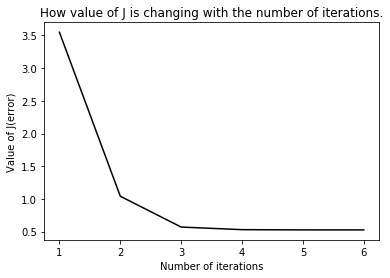

In [46]:
%matplotlib inline
plt.plot(list(range(1,len(mean_square_list) + 1)), mean_square_list, 'k')
plt.xlabel('Number of iterations')
plt.ylabel('Value of J(error)')
plt.title('How value of J is changing with the number of iterations.')

### 4.4 Suggest different ways to choose the number of iterations to get quality clusters
* We will stop looping when J is not changing much, like if difference between J of i'th iteration and (i+1)'th iteration is less than 0.001
* We will stop looping if centers are not changing.
* We will stop looping when assignment of nodes to clusters are not changing.
* We can also set a maximum number of iterations combinded with above two methods.

## Question 5: Compare the results of both k-means and agglomerative clustering algorithms

### First we will run both algorithms on out dataset and store the results for further questions

In [47]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

iris_data_without_labels = iris_data[list(iris_data.columns[:-1])]

# Run kmeans algorithm and print the result
kmeans_model = KMeans(n_clusters=3)
kmeans_result = kmeans_model.fit(iris_data_without_labels)
print("Labels assigned to our data by kmeans : ", kmeans_result.labels_)

# Run agglomerative clustering algorithm and print the result
agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering_result = agglomerative_clustering_model.fit(iris_data_without_labels)
print("Labels assigned to our data by agglomerative clustering : ", agglomerative_clustering_result.labels_)

# Printing True labels
print("True labels : ",np.array(iris_data.species))

Labels assigned to our data by kmeans :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Labels assigned to our data by agglomerative clustering :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
True labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

### 5.1 Compare the performance of k-means and agglomerative clustering methods on the iris dataset. 

#### Comparing the results of both algorithms with true labels

In [48]:
print("Result of kmeans : ")
kmeans_unique_class , kmeans_unique_class_counts = np.unique(kmeans_result.labels_, return_counts=True)
for x , y in zip(kmeans_unique_class, kmeans_unique_class_counts):
    print("The number of observations assigned class",x,"is",y)

print("Result of agglomerative clustering : ")
agglomerative_clustering_unique_class , agglomerative_clustering_unique_class_counts = np.unique(agglomerative_clustering_result.labels_, return_counts=True)
for x , y in zip(agglomerative_clustering_unique_class, agglomerative_clustering_unique_class_counts):
    print("The number of observations assigned class",x,"is",y)

print("True labels :")
target_classes = ['setosa','versicolor','virginica']
true_unique_class , true_unique_class_counts = np.unique(np.array(iris_data.species), return_counts=True)
for x , y in zip(true_unique_class, true_unique_class_counts):
    print("The number of observations assigned class",target_classes[x],"is",y)

Result of kmeans : 
The number of observations assigned class 0 is 62
The number of observations assigned class 1 is 50
The number of observations assigned class 2 is 38
Result of agglomerative clustering : 
The number of observations assigned class 0 is 64
The number of observations assigned class 1 is 50
The number of observations assigned class 2 is 36
True labels :
The number of observations assigned class setosa is 50
The number of observations assigned class versicolor is 50
The number of observations assigned class virginica is 50


#### Analysis:
We have observed the number to points assigned to each classes by different algorithms and comparing them with true classes. We can see that these numbers are similar in both algorithms but they differ significantly with the actual number of data points in each classes. Though the number of points assigned to each classes are similar, but kmeans are giving comparatively better results than the another one.

### 5.2 Compare the two algorithms with respect to the cluster formation; for example, plot the results of the two algorithms using 3-D scatter plots, and explain. 

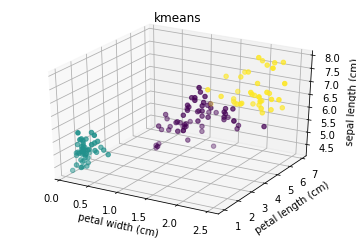

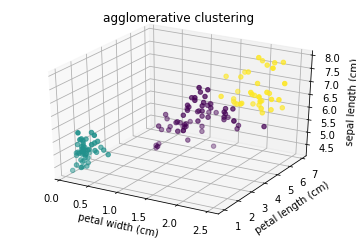

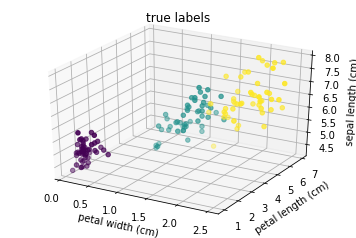

In [49]:
# we are taking petal width, petal length and sepal length as our 3 axes

# Creating plot for kmeans
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=pd.Series(kmeans_result.labels_))
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("kmeans")
plt.show()

# Creating plot for agglomerative clustering
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=pd.Series(agglomerative_clustering_result.labels_))
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("agglomerative clustering")
plt.show()

# Creating plot with true labels
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=iris_data.species)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("true labels")
plt.show()

#### Analysis:
We can make following observations from the above 3D plots : 
* All points belonging to Setosa, are grouped in a single class by both algorithms.
* Some points beloging to versicolor, are assigned to the other class by both algorithms.
* The results produced by both of the algorithms are very similar.

### 5.3 Study the effect of initial configuration for the two algorithms.

#### 5.3.1 Effect of initial configuration for k-means

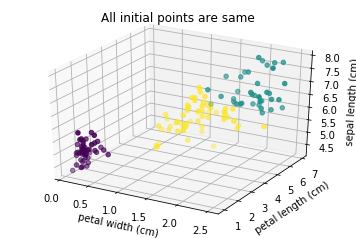

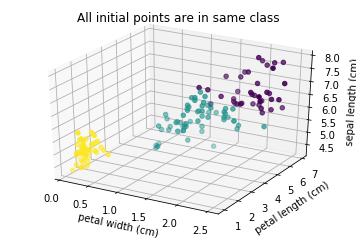

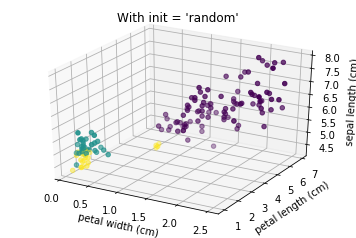

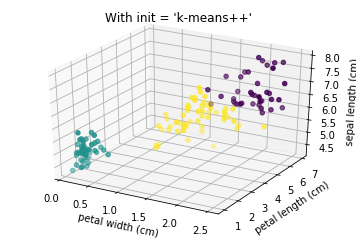

In [50]:
# Case 1 - All initial points are same
case_1_init = np.array([(iris_data_without_labels.loc[0,:]) for x in range(3)])
case_1_kmeans_model = KMeans(n_clusters=3,init=case_1_init,n_init=1)
case_1_kmeans_model_result = case_1_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_1_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("All initial points are same")
plt.show()

# Case 2 - All initial points are in same class
case_2_init = np.array([(iris_data_without_labels.loc[x,:]) for x in range(3)])
case_2_kmeans_model = KMeans(n_clusters=3,init=case_2_init,n_init=1)
case_2_kmeans_model_result = case_2_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_2_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("All initial points are in same class")
plt.show()

# Case 3 - With init = 'random'
case_3_kmeans_model = KMeans(n_clusters=3,init='random',n_init=1)
case_3_kmeans_model_result = case_3_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_3_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("With init = 'random'")
plt.show()

# Case 4 - With init = 'k-means++'
case_4_kmeans_model = KMeans(n_clusters=3,init='k-means++',n_init=1)
case_4_kmeans_model_result = case_4_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_4_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("With init = 'k-means++'")
plt.show()

Since there is no difference between the plots with the different initialization, we are going to limit maximun iteration to 5

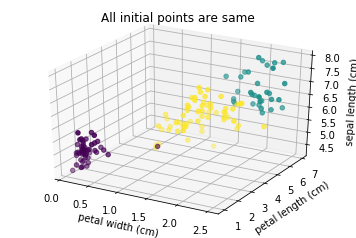

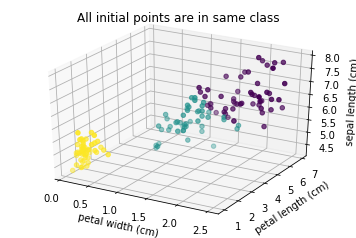

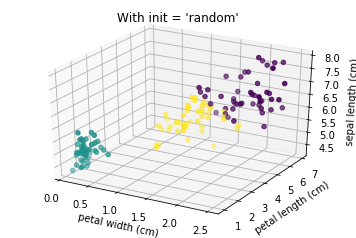

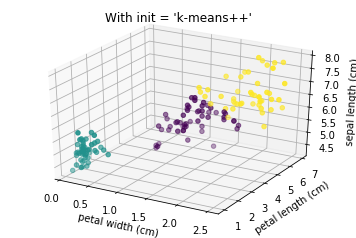

In [51]:
# Case 1 - All initial points are same
case_1_init = np.array([(iris_data_without_labels.loc[0,:]) for x in range(3)])
case_1_kmeans_model = KMeans(n_clusters=3,init=case_1_init,n_init=1, max_iter=5)
case_1_kmeans_model_result = case_1_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_1_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("All initial points are same")
plt.show()

# Case 2 - All initial points are in same class
case_2_init = np.array([(iris_data_without_labels.loc[x,:]) for x in range(3)])
case_2_kmeans_model = KMeans(n_clusters=3,init=case_2_init,n_init=1, max_iter=5)
case_2_kmeans_model_result = case_2_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_2_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("All initial points are in same class")
plt.show()

# Case 3 - With init = 'random'
case_3_kmeans_model = KMeans(n_clusters=3,init='random',n_init=1, max_iter=5)
case_3_kmeans_model_result = case_3_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_3_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("With init = 'random'")
plt.show()

# Case 4 - With init = 'k-means++'
case_4_kmeans_model = KMeans(n_clusters=3,init='k-means++',n_init=1, max_iter=5)
case_4_kmeans_model_result = case_4_kmeans_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_4_kmeans_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("With init = 'k-means++'")
plt.show()

#### Analysis
By limiting the maximum iteration to 5, we can see that if we choose centriods badly then it will take more iterations to make better clusters.

#### 5.3.2 Study of the effect of initial configurations on agglomerative clustering algorithm

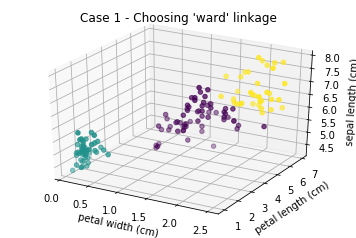

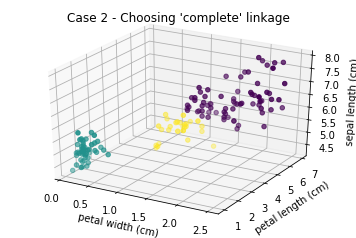

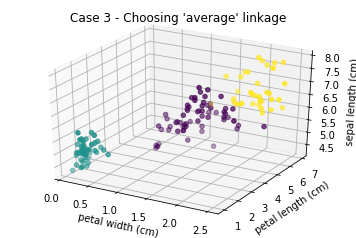

In [52]:
# Case 1 - Choosing 'ward' linkage
case_1_agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3,linkage='ward')
case_1_agglomerative_clustering_model_result = case_1_agglomerative_clustering_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_1_agglomerative_clustering_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("Case 1 - Choosing 'ward' linkage")
plt.show()

# Case 2 - Choosing 'complete' linkage
case_2_agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3,linkage='complete')
case_2_agglomerative_clustering_model_result = case_2_agglomerative_clustering_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_2_agglomerative_clustering_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("Case 2 - Choosing 'complete' linkage")
plt.show()

# Case 3 - Choosing 'average' linkage
case_3_agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3,linkage='average')
case_3_agglomerative_clustering_model_result = case_3_agglomerative_clustering_model.fit(iris_data_without_labels)
# Creating plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(iris_data_without_labels.petal_width, 
           iris_data_without_labels.petal_length, 
           iris_data_without_labels.sepal_length, 
           c=case_3_agglomerative_clustering_model_result.labels_)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('sepal length (cm)')
ax.set_title("Case 3 - Choosing 'average' linkage")
plt.show()

Here we can see there are difference between how running agglomerative clustering with different linkage assigned classes to some points of versicolor and virginica. So to explore further, we will also look on each cases at the number of data points present in each classes.

In [53]:
# Case 1 - Choosing 'ward' linkage
case_1_agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3,linkage='ward')
case_1_agglomerative_clustering_model_result = case_1_agglomerative_clustering_model.fit(iris_data_without_labels)
print("Case 1 - Choosing 'ward' linkage")
case_1_agglomerative_clustering_unique_class , case_1_agglomerative_clustering_unique_class_counts = np.unique(case_1_agglomerative_clustering_model_result.labels_, return_counts=True)
for x , y in zip(case_1_agglomerative_clustering_unique_class , case_1_agglomerative_clustering_unique_class_counts):
    print("The number of observations assigned class",x,"is",y)
    

# Case 2 - Choosing 'complete' linkage
case_2_agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3,linkage='complete')
case_2_agglomerative_clustering_model_result = case_2_agglomerative_clustering_model.fit(iris_data_without_labels)
print("Case 2 - Choosing 'complete' linkage")
case_2_agglomerative_clustering_unique_class , case_2_agglomerative_clustering_unique_class_counts = np.unique(case_2_agglomerative_clustering_model_result.labels_, return_counts=True)
for x , y in zip(case_2_agglomerative_clustering_unique_class , case_2_agglomerative_clustering_unique_class_counts):
    print("The number of observations assigned class",x,"is",y)

# Case 3 - Choosing 'average' linkage
case_3_agglomerative_clustering_model = AgglomerativeClustering(n_clusters=3,linkage='average')
case_3_agglomerative_clustering_model_result = case_3_agglomerative_clustering_model.fit(iris_data_without_labels)
print("Case 3 - Choosing 'average' linkage")
case_3_agglomerative_clustering_unique_class , case_3_agglomerative_clustering_unique_class_counts = np.unique(case_3_agglomerative_clustering_model_result.labels_, return_counts=True)
for x , y in zip(case_3_agglomerative_clustering_unique_class , case_3_agglomerative_clustering_unique_class_counts):
    print("The number of observations assigned class",x,"is",y)

Case 1 - Choosing 'ward' linkage
The number of observations assigned class 0 is 64
The number of observations assigned class 1 is 50
The number of observations assigned class 2 is 36
Case 2 - Choosing 'complete' linkage
The number of observations assigned class 0 is 72
The number of observations assigned class 1 is 50
The number of observations assigned class 2 is 28
Case 3 - Choosing 'average' linkage
The number of observations assigned class 0 is 64
The number of observations assigned class 1 is 50
The number of observations assigned class 2 is 36


From above results, we can see that it is the 'complete' linkage that is giving us bad results comparitive to other two linkages. And we can see that here the difference is results is significant. So one method to select which linkage to use is apply all three linkages and analyse which linkage is giving us best results.

## Question 6: Selecting k. Come up with an empirical strategy.

### 6.1 How do you choose k for the k-means algorithm? 
* Elbow method : Run k-mean algorithm for with different values of k and then we will choose k till which error value is decreasing sharply.
* Run agglomerative clustering algorithm on taking a smaller set of orginal data : Agglomerative clustering algorithms is more expensive in terms of time than k-means algorithm. But it gives us an idea about the number of clusters present in dataset.
* While choosing k we will make sure that k << m (where m = number of data points).
* Visualizion of data points are used to get an idea about number of clusters.
* Use other information about the dataset if it's available. For example suppose you have a data of weights of people and you want to make one cluster for men and one for women. Here you should use k = 2
### 6.2 How do you choose k for the agglomerative clustering algorithm? 
* Dendrogram fromed from the dataset is used to have an idea about choosing a nice k.
* Run agglomerative clustering algorithm for with different values of k and then we will choose k till which error value is decreasing sharply.
* While choosing k we will make sure that k << m (where m = number of data points).
* Visualizion of data points are used to get an idea about number of clusters.
* Use other information about the dataset if it's available. For example suppose you have a data of weights of people and you want to make one cluster for men and one for women. Here you should use k = 2
#### There are some methods which are common to all clustering algorithms, so some methods are written for both algorithms.

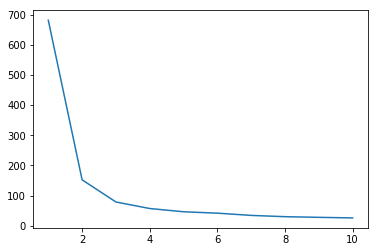

In [54]:
error_list_for_different_k = []
for number_of_clusters in range(1,11):
    # Run kmeans algorithm and save the error to list
    kmeans_model = KMeans(n_clusters=number_of_clusters)
    kmeans_result = kmeans_model.fit(iris_data_without_labels)
    error_list_for_different_k.append(kmeans_result.inertia_)
plt.plot(list(range(1,11)), error_list_for_different_k)
plt.show()

 #### Elbow method in action
From above plot, we can see that the error value is decreasing sharply till k = 3. And we also have context of problem that we want to cluster 3 different species of iris, so we have chosen k = 3